## Distances

In [179]:
import numpy as np
import pandas as pd
import networkx as nx
import itertools
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
distances_df = pd.read_csv ('distances.csv')
names = {0: 'Dwayne\nJohnson', 1: 'Chris\nHemsworth', 2: 'Robert\nDowney Jr.', 3: 'Akshay\nKumar', 4: 'Jackie\nChan',
           5:'Bradley\nCooper', 6:'Adam\nSandler', 7:'Scarlett\nJohansson', 8:'Sofia\nVergara', 9:'Chris\nEvans'}

In [181]:
distances_df

,Dwayne Johnson,Chris Hemsworth,Robert Downey Jr.,Akshay Kumar,Jackie Chan,Bradley Cooper,Adam Sandler,Scarlett Johansson,Sofia Vergara,Chris Evans
0,0,2,2,3,3,3,3,2,-1,2
1,0,0,1,3,-1,3,3,1,3,1
2,0,0,0,-1,-1,3,-1,1,3,1
3,0,0,0,0,-1,2,3,2,-1,2
4,0,0,0,0,0,-1,-1,-1,-1,-1
5,0,0,0,0,0,0,3,3,3,2
6,0,0,0,0,0,0,0,2,3,3
7,0,0,0,0,0,0,0,0,-1,1
8,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0


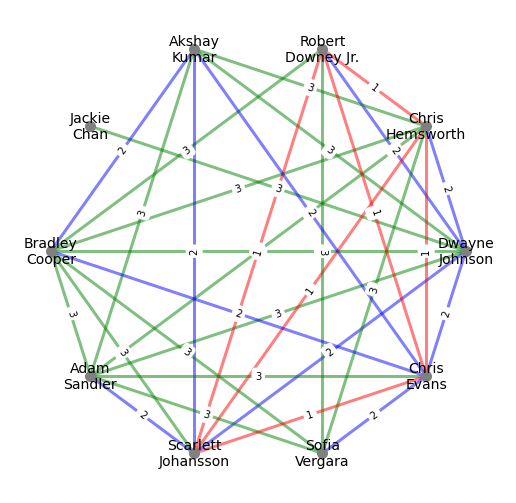

In [182]:
distance = distances_df.values.tolist()
node_numbers = [i for i in range(10)]
node_pairs = itertools.combinations(node_numbers, 2)
labels = dict()

G = nx.Graph()
G.add_nodes_from(node_numbers)

for i in node_pairs:
    if distance[i[0]][i[1]] == 1:
        G.add_edge(i[0], i[1], color='red', weight=1)
    elif distance[i[0]][i[1]] == 2:
        G.add_edge(i[0], i[1], color='blue', weight=2)
    elif distance[i[0]][i[1]] == 3:
        G.add_edge(i[0], i[1], color='green', weight=3)
        
edges = G.edges()
nodes = G.nodes()
colors = [G[u][v]['color'] for u, v in edges]
    
for e in G.edges:
    labels[e] = str(G[e[0]][e[1]]['weight'])

plt.figure(1,figsize=(9, 9)) 
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='gray', node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha = 0.5, width=3, edge_color=colors) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, labels=names, font_size=14)

plt.axis("off")
plt.show()


In [183]:
def graw_graph(data, level, color):
    
    node_numbers = [i for i in range(len(data))]
    node_pairs = itertools.combinations(node_numbers, 2)
    labels = dict()

    G = nx.Graph()
    G.add_nodes_from(node_numbers)

    for i in node_pairs:
        if distance[i[0]][i[1]] == level:
            G.add_edge(i[0], i[1], color=color, weight=level)

    edges = G.edges()
    nodes = G.nodes()
    colors = [G[u][v]['color'] for u, v in edges]

    for e in G.edges:
        labels[e] = str(G[e[0]][e[1]]['weight'])

    plt.figure(level,figsize=(9, 7)) 
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='gray', node_size=100)
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha = 0.5, width=3, edge_color=colors) 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_labels(G, pos, labels=names, font_size=12)

    plt.axis("off")
    plt.show()
    

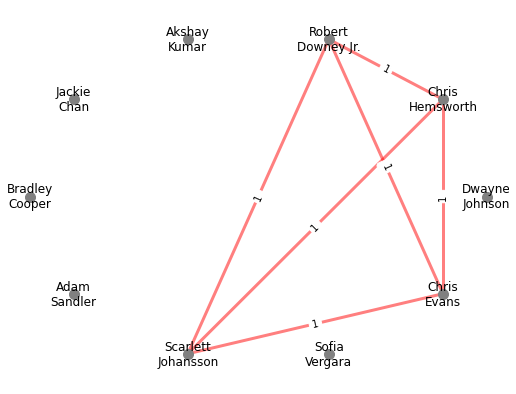

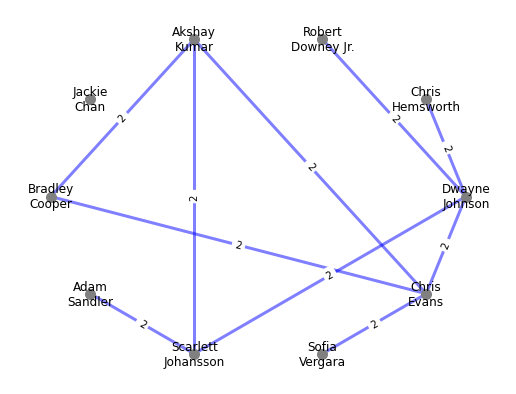

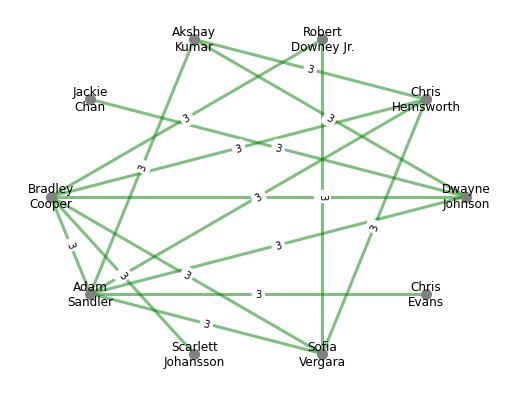

In [184]:
graw_graph(distance, 1, 'red')
graw_graph(distance, 2, 'blue')
graw_graph(distance, 3, 'green')

## Word Cloud

In [185]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [186]:
def process_description(dir_name, file_name):
    result = ''
    save_path = os.path.join(dir_name, file_name)

    with open(save_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            txt = line.split('—')[0]
            txt = re.sub("[\(\[].*?[\)\]]", "", txt)
            result += txt.strip('\n') + ' '
    return result

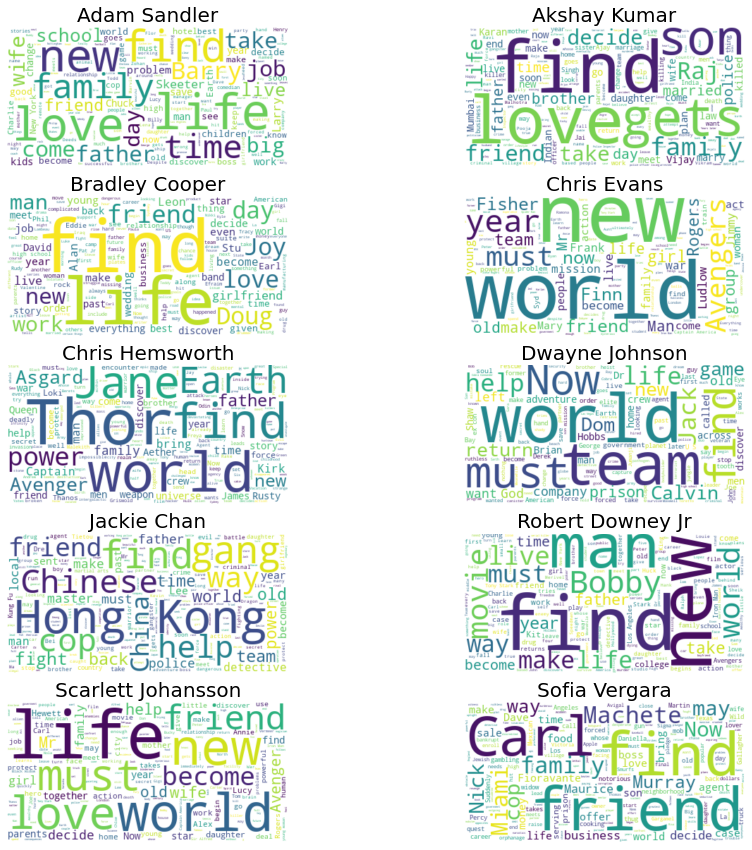

In [187]:
save_dir = 'txt_files'
stopwords = set(STOPWORDS)
stopwords.update(['Dwayne', 'Johnson', 'Chris', 'Hemsworth', 'Robert', 'Downey', 'Akshay', 'Kumar', 'Jackie', 'Chan',
           'Bradley', 'Cooper', 'Adam', 'Sandler', 'Scarlett', 'Johansson', 'Sofia', 'Vergara', 'Chris', 'Evans',
            'one', 'two', 'three', 'will'])

count = 0

fig = plt.figure(figsize=(15, 15))
rows = 5
columns = 2


if os.path.exists(save_dir):
    files = os.listdir(save_dir)
    for file in files:
        if '.txt' in file:
            count += 1
            desc_text = process_description(save_dir, file)
            wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(desc_text)
            fig.add_subplot(rows, columns, count)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt_name = file.split('.')[0].replace('_', ' ')
            plt.title(plt_name, fontsize = 20)
    
else:
    print(f'Can not find directory {save_dir}')